<a href="https://colab.research.google.com/github/godwins3/ml-playground/blob/main/projects/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print("setup complete")

setup complete


In [ ]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
174018,No,40.51,No,No,No,0.0,10.0,No,Female,30-34,Other,Yes (during pregnancy),No,Very good,8.0,No,No,No
138106,No,21.48,No,No,No,0.0,0.0,No,Female,80 or older,White,No,Yes,Excellent,8.0,No,No,No
304606,No,25.79,No,No,No,0.0,2.0,No,Female,18-24,White,No,Yes,Very good,9.0,Yes,No,No
159897,No,23.89,Yes,No,No,1.0,0.0,No,Female,50-54,Other,No,Yes,Excellent,7.0,No,No,No
11206,No,25.83,Yes,No,No,0.0,20.0,No,Male,35-39,White,No,No,Good,6.0,No,No,No
143628,No,28.25,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,8.0,No,No,No
83721,No,34.46,No,No,No,0.0,0.0,No,Male,50-54,White,No,Yes,Good,6.0,No,No,No
52693,No,24.80,No,No,No,0.0,0.0,No,Female,80 or older,White,No,No,Excellent,9.0,No,No,Yes
47234,No,38.52,No,No,No,15.0,10.0,Yes,Male,65-69,Black,Yes,Yes,Fair,8.0,No,No,No
121915,No,25.75,Yes,No,No,3.0,1.0,No,Female,60-64,White,No,Yes,Very good,7.0,No,No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
data.shape

(319795, 18)

In [ ]:
data.PhysicalActivity.value_counts()

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64

In [ ]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

<Axes: xlabel='HeartDisease', ylabel='PhysicalHealth'>

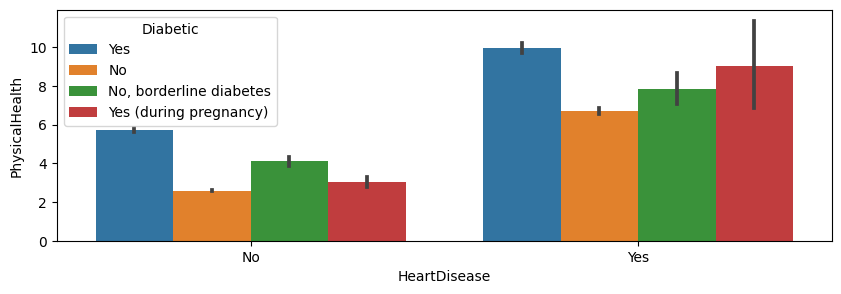

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(data=data, x='HeartDisease', y='PhysicalHealth', hue="Diabetic")

<Axes: xlabel='HeartDisease', ylabel='count'>

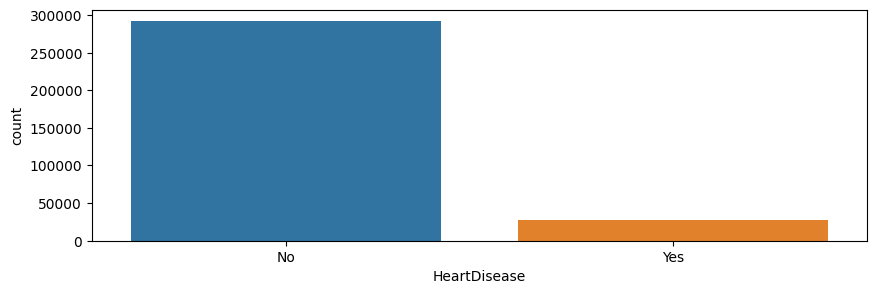

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, x =  'HeartDisease')

In [ ]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<function matplotlib.pyplot.show(close=None, block=None)>

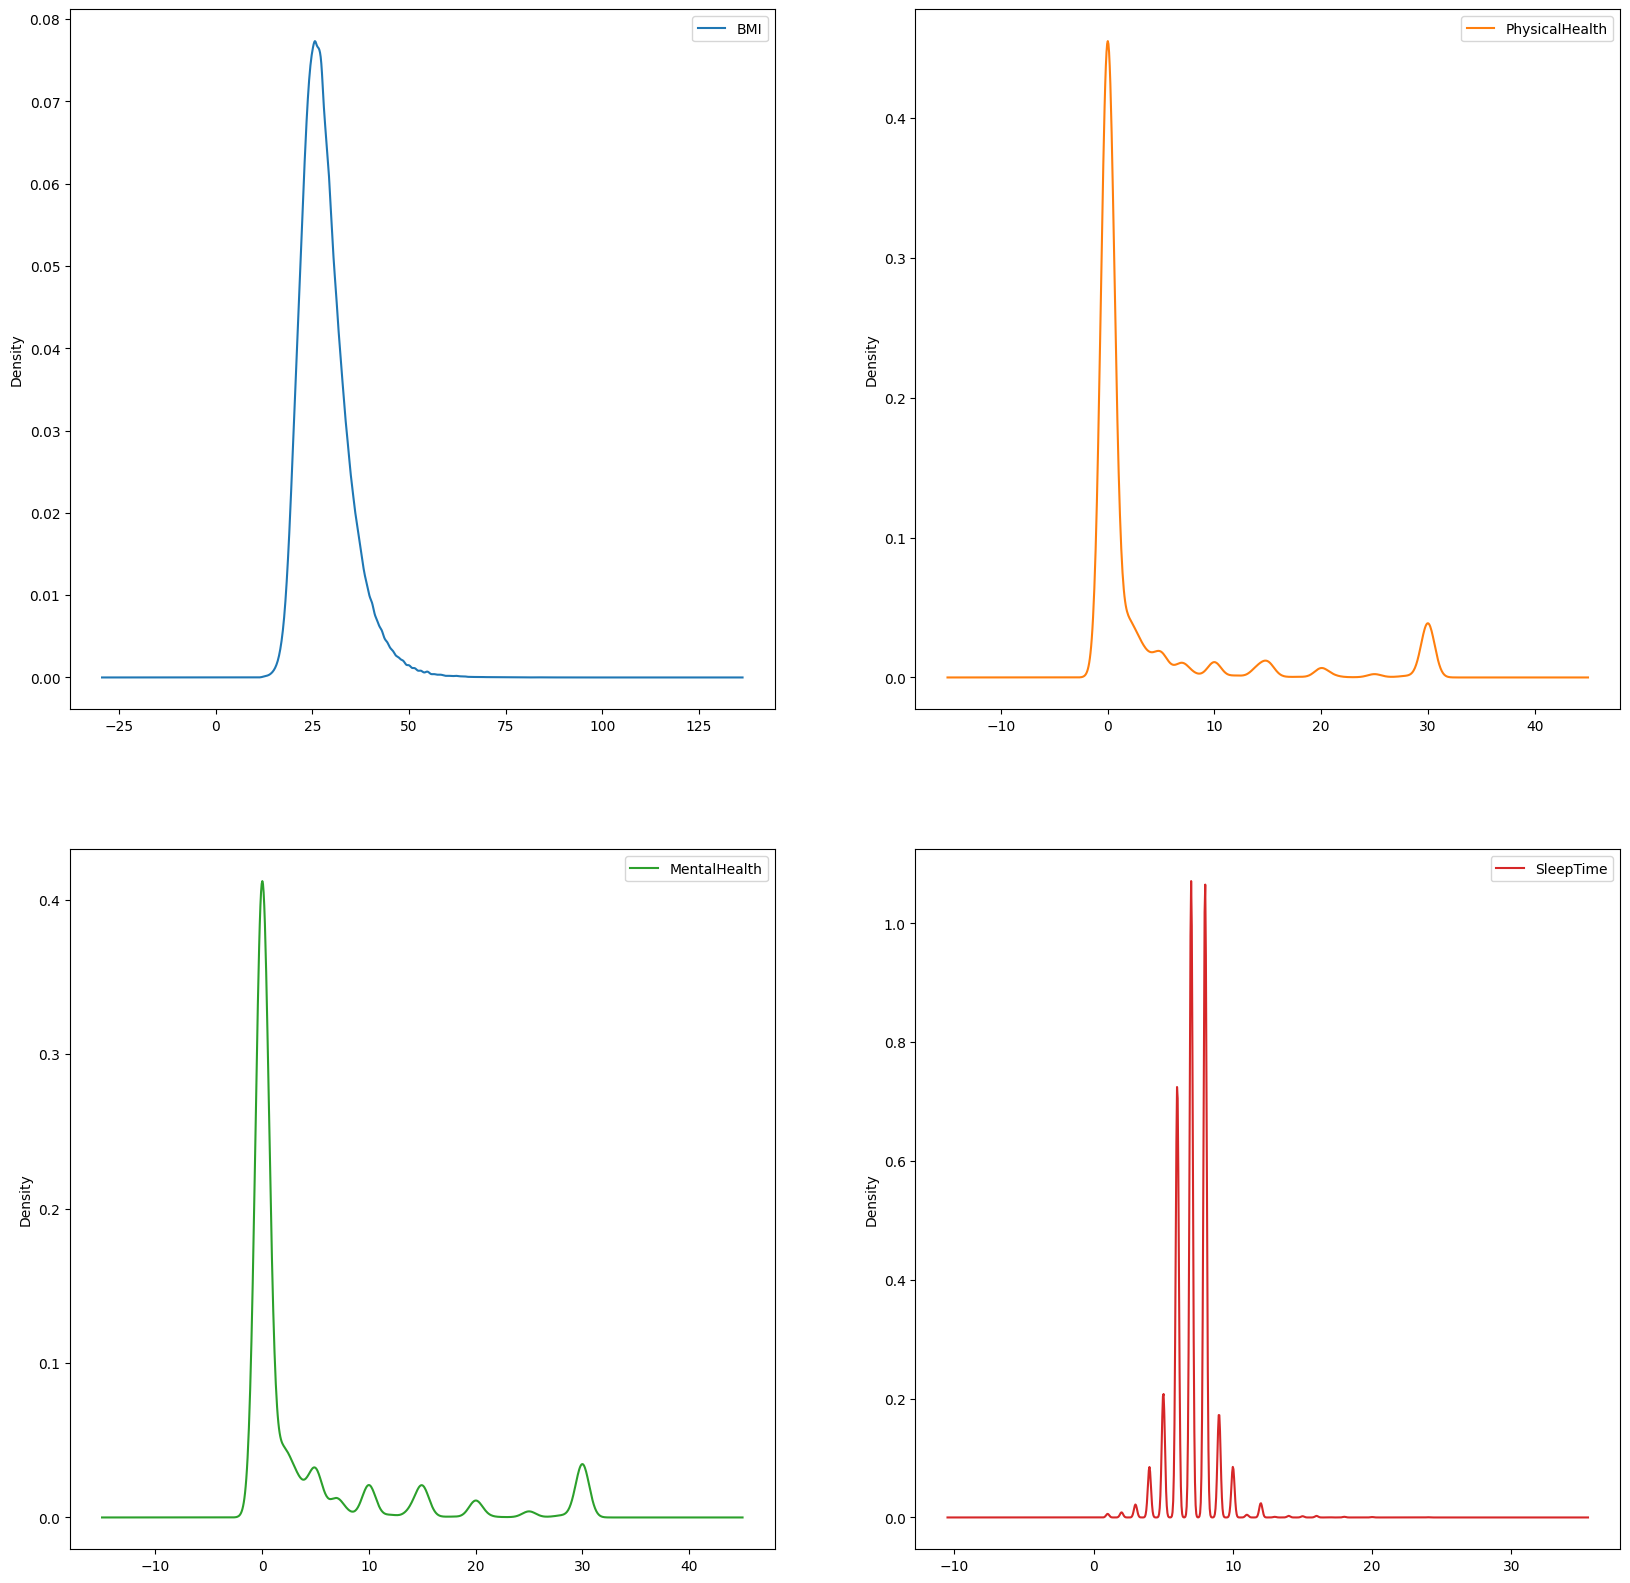

In [ ]:
data.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

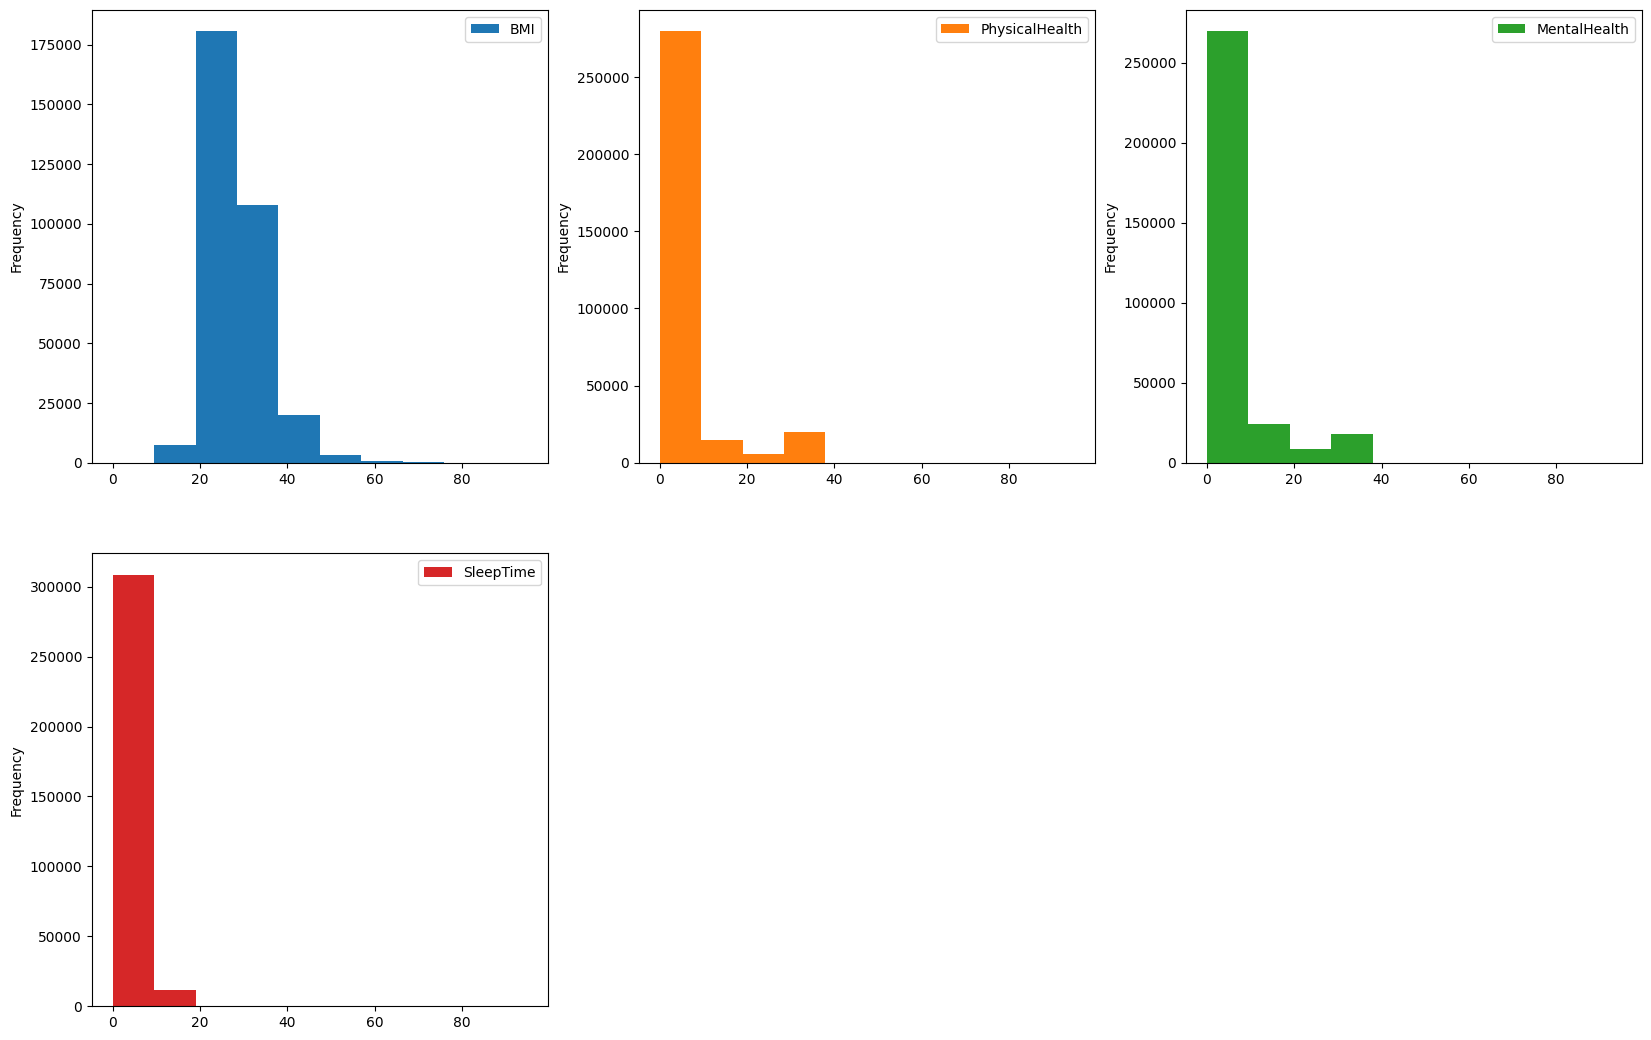

In [ ]:
data.plot(kind='hist', subplots=True, layout=(3,3), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

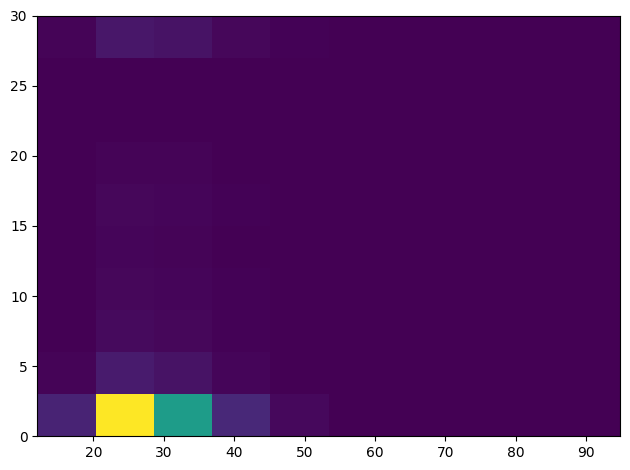

In [ ]:
x = data['BMI']
y = data['PhysicalHealth']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

<Axes: xlabel='SleepTime', ylabel='count'>

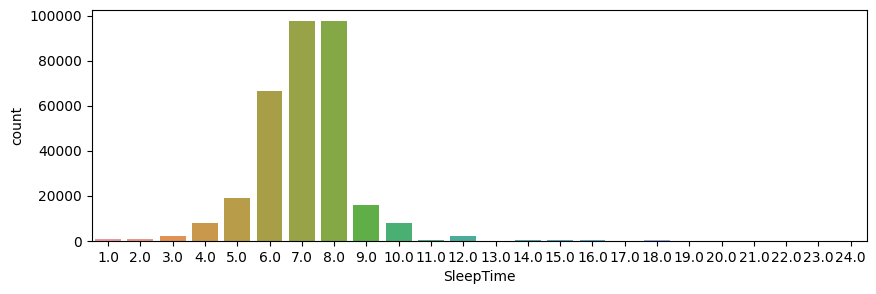

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, x = 'SleepTime')

In [ ]:
data.plot(kind='bar', subplots=True, layout=(3,3), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

NameError: ignored

In [ ]:
df = data.copy()